In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf


In [ ]:
import google.colab
google.colab.drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_train = pd.read_csv("/content/drive/MyDrive/IBS_DATA/data_set_ALL_AML_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/IBS_DATA/data_set_ALL_AML_independent.csv")
df_actual = pd.read_csv("/content/drive/MyDrive/IBS_DATA/actual.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
   patient cancer
0        1    ALL
1        2    ALL
2        3    ALL
3        4    ALL
4        5    ALL
cancer
ALL    47
AML    25
Name: count, dtype: int64
Shape of Actual Data: (72, 2)


<ipython-input-15-b0f459cf691f>:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  labels_df = gene_expression_df.replace({'ALL': 0, 'AML': 1})


Shape of Training Data: (7129, 78)
Shape of Testing Data: (7129, 70)
Shape of Training Data: (38, 7129)
Shape of Testing Data: (34, 7129)


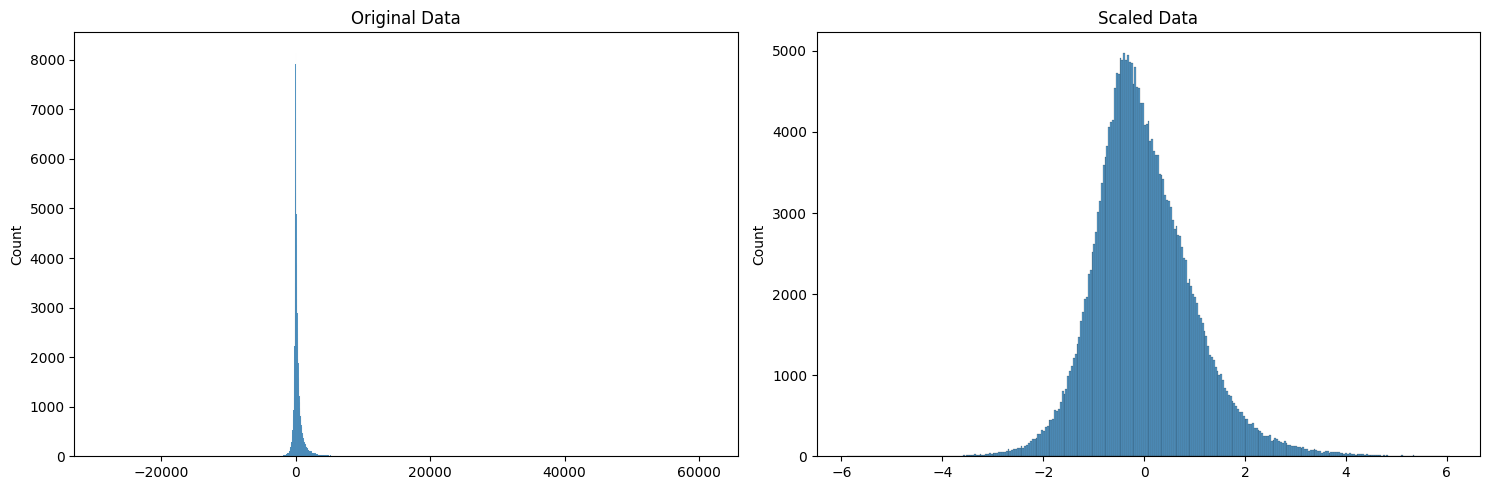

Training PCA Shape: (38, 32)
Testing PCA Shape: (34, 32)


<ipython-input-15-b0f459cf691f>:86: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pca_3_components[:, 0], pca_3_components[:, 1], pca_3_components[:, 2], c=colors, cmap=plt.cm.Paired, linewidths=10)


<Figure size 1000x600 with 0 Axes>

Epoch 1/200


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - binary_accuracy: 0.7664 - loss: 4.1872 - val_binary_accuracy: 0.5294 - val_loss: 4.5290
Epoch 2/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - binary_accuracy: 0.7524 - loss: 3.3918 - val_binary_accuracy: 0.5294 - val_loss: 3.9697
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - binary_accuracy: 0.7524 - loss: 2.7057 - val_binary_accuracy: 0.5000 - val_loss: 3.4579
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.8046 - loss: 2.1343 - val_binary_accuracy: 0.5000 - val_loss: 3.0098
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - binary_accuracy: 0.8046 - loss: 1.6504 - val_binary_accuracy: 0.4706 - val_loss: 2.6189
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - binary_accuracy: 0.8115 - loss: 1.2296 - val_binary_accuracy: 0.4412 - val_loss: 2.2896
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - binary_accuracy: 0.8255 - loss: 0.8929 - val_binary_accuracy: 0.4412 - val_loss: 2.0209
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━

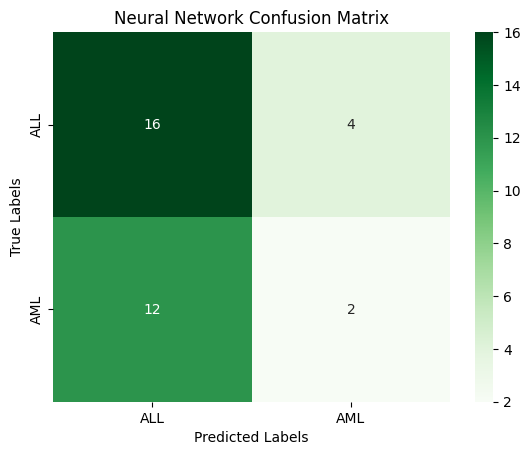

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


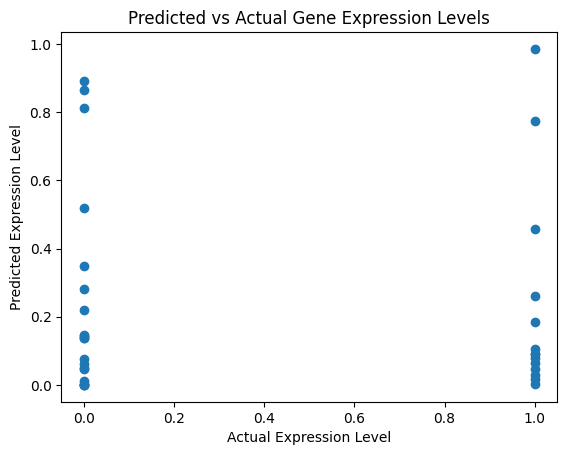

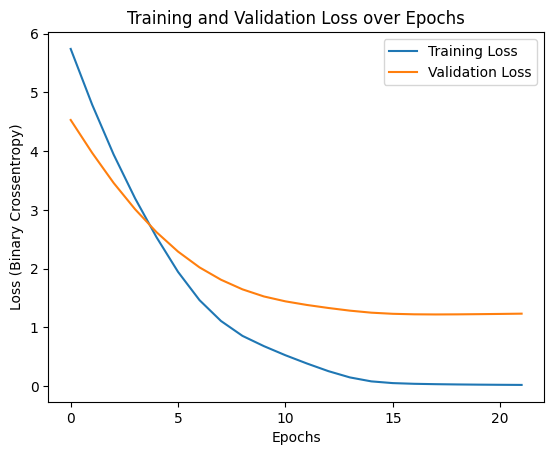

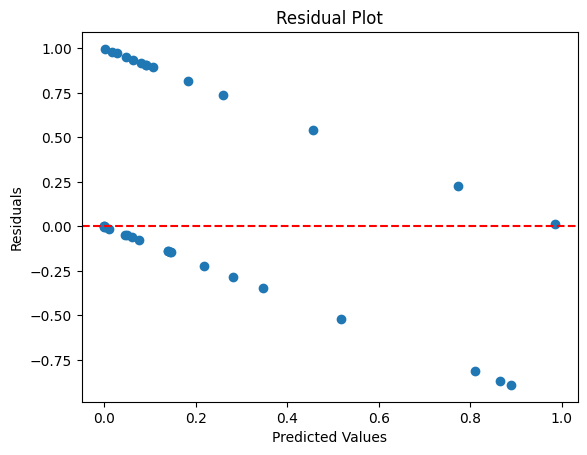

In [ ]:
import numpy as np
np.random.seed(0)
from tensorflow.random import set_seed
set_seed(0)

import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Mount Google Drive
import google.colab
google.colab.drive.mount('/content/drive')

# Load actual gene expression data
gene_expression_df = pd.read_csv('/content/drive/MyDrive/IBS_DATA/actual.csv')
print(gene_expression_df.head())
print(gene_expression_df['cancer'].value_counts())
print("Shape of Actual Data:", gene_expression_df.shape)

# Prepare labels
labels_df = gene_expression_df.replace({'ALL': 0, 'AML': 1})
labels_df = labels_df.set_index('patient')
label_names = ['ALL', 'AML']

# Load training and testing data
train_data_df = pd.read_csv('/content/drive/MyDrive/IBS_DATA/data_set_ALL_AML_train.csv')
test_data_df = pd.read_csv('/content/drive/MyDrive/IBS_DATA/data_set_ALL_AML_independent.csv')
print("Shape of Training Data:", train_data_df.shape)
print("Shape of Testing Data:", test_data_df.shape)

# Filter out unwanted columns and transpose
train_data_columns = [col for col in train_data_df.columns if "call" not in col]
test_data_columns = [col for col in test_data_df.columns if "call" not in col]
X_train_df = train_data_df[train_data_columns].T
X_test_df = test_data_df[test_data_columns].T

# Set gene names as column headers and drop metadata rows
X_train_df.columns = X_train_df.iloc[1]
X_test_df.columns = X_test_df.iloc[1]
X_train_df = X_train_df.drop(['Gene Description', 'Gene Accession Number'])
X_test_df = X_test_df.drop(['Gene Description', 'Gene Accession Number'])

# Sort indices numerically
X_train_df.index = X_train_df.index.astype(int)
X_test_df.index = X_test_df.index.astype(int)
X_train_df.sort_index(inplace=True)
X_test_df.sort_index(inplace=True)

print("Shape of Training Data:", X_train_df.shape)
print("Shape of Testing Data:", X_test_df.shape)

# Split labels into training and testing sets
train_labels = labels_df['cancer'][:38]
test_labels = labels_df['cancer'][38:]

# Scale data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_df)
X_test_scaled = scaler.transform(X_test_df)

# Plot distribution of scaled data
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.histplot(X_train_df.values.flatten(), ax=ax[0]).set_title('Original Data')
sns.histplot(X_train_scaled.flatten(), ax=ax[1]).set_title('Scaled Data')
plt.tight_layout()
plt.show()

# Apply PCA for dimensionality reduction
pca_model = PCA(n_components=0.95)
X_train_pca = pca_model.fit_transform(X_train_scaled)
X_test_pca = pca_model.transform(X_test_scaled)
print("Training PCA Shape:", X_train_pca.shape)
print("Testing PCA Shape:", X_test_pca.shape)

# PCA visualization with 3 components
pca_3_components = PCA(n_components=3).fit_transform(X_train_scaled)
colors = np.where(train_labels == 0, 'red', 'blue')
fig = plt.figure(1, figsize=(10, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(pca_3_components[:, 0], pca_3_components[:, 1], pca_3_components[:, 2], c=colors, cmap=plt.cm.Paired, linewidths=10)
ax.set_title("First Three PCA Directions")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
plt.show()

# Neural Network Model
neural_network = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_pca.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

neural_network.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['binary_accuracy']
)

# Early stopping callback
early_stopping_callback = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.005,
    restore_best_weights=True,
)

# Train the model
training_history = neural_network.fit(
    X_train_pca, train_labels,
    validation_data=(X_test_pca, test_labels),
    batch_size=8,
    epochs=200,
    callbacks=[early_stopping_callback]
)

# Predictions and evaluation
test_predictions = (neural_network.predict(X_test_pca) > 0.5).astype("int32")
print('Neural Network Accuracy:', round(accuracy_score(test_labels, test_predictions), 3))

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, test_predictions)
ax = plt.subplot()
sns.heatmap(conf_matrix, annot=True, ax=ax, fmt='g', cmap='Greens')
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Neural Network Confusion Matrix')
ax.xaxis.set_ticklabels(label_names)
ax.yaxis.set_ticklabels(label_names)
plt.show()

# Plot predicted vs actual gene expression levels
predicted_labels = neural_network.predict(X_test_pca).flatten()
plt.scatter(test_labels, predicted_labels)
plt.xlabel("Actual Expression Level")
plt.ylabel("Predicted Expression Level")
plt.title("Predicted vs Actual Gene Expression Levels")
plt.show()

# Training and validation loss plot over epochs
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (Binary Crossentropy)")
plt.legend()
plt.title("Training and Validation Loss over Epochs")
plt.show()

# Residual plot to check for patterns
residuals = test_labels - predicted_labels
plt.scatter(predicted_labels, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


In [ ]:
import numpy as np
np.random.seed(0)
from tensorflow.random import set_seed
set_seed(0)

import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import google.colab
google.colab.drive.mount('/content/drive')

# Load and inspect actual labels dataset
gene_expression_df = pd.read_csv('/content/drive/MyDrive/IBS_DATA/actual.csv')
gene_expression_df.head()

gene_expression_df['cancer_type'].value_counts()
gene_expression_df.shape

# Replace cancer types with binary values and set index
labels_df = gene_expression_df.replace({'ALL': 0, 'AML': 1})
labels_df = labels_df.set_index('patient')
cancer_labels = ['ALL', 'AML']

# Load training and testing data
train_data_df = pd.read_csv('/content/drive/MyDrive/IBS_DATA/data_set_ALL_AML_train.csv')
test_data_df = pd.read_csv('/content/drive/MyDrive/IBS_DATA/data_set_ALL_AML_independent.csv')

print("Shape of Training Data:", train_data_df.shape)
print("Shape of Testing Data:", test_data_df.shape)

train_data_df.head()

# Select relevant columns without "call" information
train_features = [col for col in train_data_df.columns if "call" not in col]
test_features = [col for col in test_data_df.columns if "call" not in col]

X_train_raw = train_data_df[train_features]
X_test_raw = test_data_df[test_features]

# Transpose data to have genes as columns and patients as rows
X_train = X_train_raw.T
X_test = X_test_raw.T

# Set gene accession numbers as column headers and remove description rows
X_train.columns = X_train.iloc[1]
X_test.columns = X_test.iloc[1]
X_train = X_train.drop(['Gene Description', 'Gene Accession Number'])
X_test = X_test.drop(['Gene Description', 'Gene Accession Number'])

# Reorder indexes to match labels
X_train.index = X_train.index.astype(int)
X_train.sort_index(inplace=True)

X_test.index = X_test.index.astype(int)
X_test.sort_index(inplace=True)

print("Shape of Training Data:", X_train.shape)
print("Shape of Testing Data:", X_test.shape)

X_train.head()

# Split labels for training and testing
y_train = labels_df['cancer_type'][:38]
y_test = labels_df['cancer_type'][38:]

# Standardize feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Plot data distribution before and after scaling
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.histplot(np.concatenate(X_train.values), ax=ax[0]).set_title('Original Data')
sns.histplot(np.concatenate(X_train_scaled), ax=ax[1]).set_title('Scaled Data')
plt.tight_layout()
plt.show()

# Dimensionality reduction - PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(X_train_pca.shape)
print(X_test_pca.shape)

# Visualize top 3 PCA components
pca_3d = PCA(n_components=3).fit_transform(X_train_scaled)
colors = np.where(y_train == 0, 'red', 'blue')
plt.clf()
fig = plt.figure(1, figsize=(10, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=colors, cmap=plt.cm.Paired, linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("PC1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PC2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PC3")
ax.w_zaxis.set_ticklabels([])
plt.show()

# Neural Network model definition
gene_expression_model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_pca.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

gene_expression_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['binary_accuracy']
)

# Define early stopping callback
early_stopping_callback = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.005,
    restore_best_weights=True,
)

# Train the model
training_history = gene_expression_model.fit(
    X_train_pca, y_train,
    validation_data=(X_test_pca, y_test),
    batch_size=8,
    epochs=200,
    callbacks=[early_stopping_callback]
)

# Predict on test data and calculate accuracy
y_pred = gene_expression_model.predict_classes(X_test_pca)
print('Neural Network accuracy:', round(accuracy_score(y_test, y_pred), 3))

# Confusion matrix visualization
confusion_mtx = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(confusion_mtx, annot=True, ax=ax, fmt='g', cmap='Greens')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Neural Network Confusion Matrix')
ax.xaxis.set_ticklabels(cancer_labels)
ax.yaxis.set_ticklabels(cancer_labels, rotation=360)

# Plot training and validation loss over epochs
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss over Epochs")
plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


KeyError: 'cancer_type'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Shape of Training Data: (7129, 78)
Shape of Testing Data: (7129, 70)


<ipython-input-21-fb44eb60bfd3>:27: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  labels_df = gene_expression_df.replace({'ALL': 0, 'AML': 1})


Shape of Training Data: (38, 7129)
Shape of Testing Data: (34, 7129)


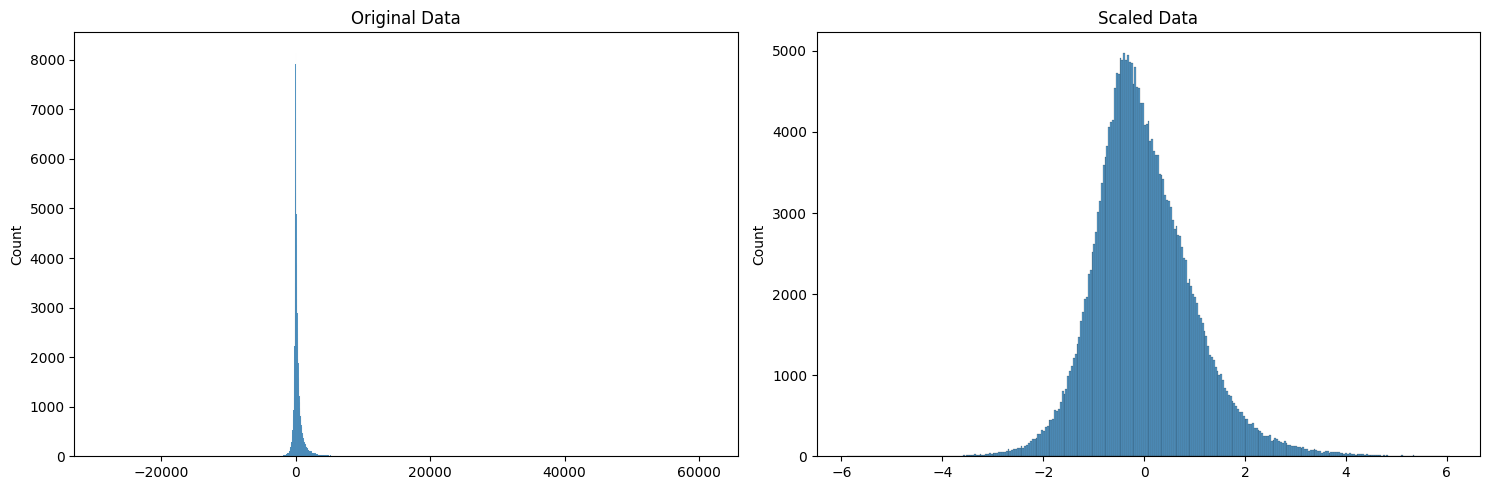

(38, 32)
(34, 32)


<ipython-input-21-fb44eb60bfd3>:100: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=colors, cmap=plt.cm.Paired, linewidths=10)


AttributeError: 'Axes3D' object has no attribute 'w_xaxis'

<Figure size 640x480 with 0 Axes>

In [ ]:
import numpy as np
np.random.seed(0)
from tensorflow.random import set_seed
set_seed(0)

import pandas as pd
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

import google.colab
google.colab.drive.mount('/content/drive')

# Load and inspect actual labels dataset
gene_expression_df = pd.read_csv('/content/drive/MyDrive/IBS_DATA/actual.csv')
gene_expression_df.head()

gene_expression_df['cancer_type'].value_counts()
gene_expression_df.shape

# Replace cancer types with binary values and set index
labels_df = gene_expression_df.replace({'ALL': 0, 'AML': 1})
labels_df = labels_df.set_index('patient')
cancer_labels = ['ALL', 'AML']

# Load training and testing data
train_data_df = pd.read_csv('/content/drive/MyDrive/IBS_DATA/data_set_ALL_AML_train.csv')
test_data_df = pd.read_csv('/content/drive/MyDrive/IBS_DATA/data_set_ALL_AML_independent.csv')

print("Shape of Training Data:", train_data_df.shape)
print("Shape of Testing Data:", test_data_df.shape)

train_data_df.head()

# Select relevant columns without "call" information
train_features = [col for col in train_data_df.columns if "call" not in col]
test_features = [col for col in test_data_df.columns if "call" not in col]

X_train_raw = train_data_df[train_features]
X_test_raw = test_data_df[test_features]

# Transpose data to have genes as columns and patients as rows
X_train = X_train_raw.T
X_test = X_test_raw.T

# Set gene accession numbers as column headers and remove description rows
X_train.columns = X_train.iloc[1]
X_test.columns = X_test.iloc[1]
X_train = X_train.drop(['Gene Description', 'Gene Accession Number'])
X_test = X_test.drop(['Gene Description', 'Gene Accession Number'])

# Reorder indexes to match labels
X_train.index = X_train.index.astype(int)
X_train.sort_index(inplace=True)

X_test.index = X_test.index.astype(int)
X_test.sort_index(inplace=True)

print("Shape of Training Data:", X_train.shape)
print("Shape of Testing Data:", X_test.shape)

X_train.head()


# Split labels for training and testing
y_train = labels_df['cancer'][:38]
y_test = labels_df['cancer'][38:]


# Standardize feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Plot data distribution before and after scaling
fig, ax = plt.subplots(ncols=2, figsize=(15, 5))
sns.histplot(np.concatenate(X_train.values), ax=ax[0]).set_title('Original Data')
sns.histplot(np.concatenate(X_train_scaled), ax=ax[1]).set_title('Scaled Data')
plt.tight_layout()
plt.show()

# Dimensionality reduction - PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
print(X_train_pca.shape)
print(X_test_pca.shape)

# Visualize top 3 PCA components
pca_3d = PCA(n_components=3).fit_transform(X_train_scaled)
colors = np.where(y_train == 0, 'red', 'blue')
plt.clf()
fig = plt.figure(1, figsize=(10, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(pca_3d[:, 0], pca_3d[:, 1], pca_3d[:, 2], c=colors, cmap=plt.cm.Paired, linewidths=10)
ax.set_title("First three PCA directions")
ax.set_xlabel("PC1")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("PC2")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("PC3")
ax.w_zaxis.set_ticklabels([])
plt.show()

# Neural Network model definition
gene_expression_model = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_pca.shape[1],)),
    layers.Dense(16, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

gene_expression_model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['binary_accuracy']
)

# Define early stopping callback
early_stopping_callback = keras.callbacks.EarlyStopping(
    patience=5,
    min_delta=0.005,
    restore_best_weights=True,
)

# Train the model
training_history = gene_expression_model.fit(
    X_train_pca, y_train,
    validation_data=(X_test_pca, y_test),
    batch_size=8,
    epochs=200,
    callbacks=[early_stopping_callback]
)

# Predict on test data and calculate accuracy
y_pred = gene_expression_model.predict_classes(X_test_pca)
print('Neural Network accuracy:', round(accuracy_score(y_test, y_pred), 3))

# Confusion matrix visualization
confusion_mtx = confusion_matrix(y_test, y_pred)
ax = plt.subplot()
sns.heatmap(confusion_mtx, annot=True, ax=ax, fmt='g', cmap='Greens')

ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Neural Network Confusion Matrix')
ax.xaxis.set_ticklabels(cancer_labels)
ax.yaxis.set_ticklabels(cancer_labels, rotation=360)

# Plot training and validation loss over epochs
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss over Epochs")
plt.show()


In [ ]:
# Display column names to verify the correct column name
print(labels_df.columns)


Index(['cancer'], dtype='object')


In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

# Load dataset - Golub et al. (Train and Test Data)
df_train = pd.read_csv("/content/drive/MyDrive/IBS_DATA/data_set_ALL_AML_train.csv")
df_test = pd.read_csv("/content/drive/MyDrive/IBS_DATA/data_set_ALL_AML_independent.csv")
df_actual = pd.read_csv("/content/drive/MyDrive/IBS_DATA/actual.csv")

# Data Cleaning: Remove non-numeric or irrelevant columns
columns_to_drop = ['Gene Description', 'Gene Accession Number'] + [col for col in df_train.columns if 'call' in col]
df_train_cleaned = df_train.drop(columns=columns_to_drop)

# Select the target column and features for prediction
# Let's say we're predicting gene '1' (as an example)
X = df_train_cleaned.drop(columns=['1'])  # Features
y = df_train_cleaned['1']  # Target (Gene Expression Level of Gene '1')

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalize the features for better performance of the ANN
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the Artificial Neural Network model using TensorFlow/Keras
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dropout(0.3),  # Regularization layer to avoid overfitting
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.3),  # Regularization
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)  # Output layer for regression (predict gene expression level)
])

# Compile the model (Regression problem using MSE loss)
model.compile(optimizer='adam', loss='mean_squared_error')

# Early stopping to prevent overfitting and reduce unnecessary training
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_scaled, y_train, epochs=100, validation_split=0.2,
                    callbacks=[early_stopping], batch_size=32)

# Predict on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model's performance using MSE and R-squared metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Save the trained model
model.save('gene_expression_model.h5')  # Save model for future use

# Load the trained model for inference on new data
new_model = tf.keras.models.load_model('gene_expression_model.h5')

# Assume df_test is the new dataset for which predictions are required
# Clean the test dataset similarly to how the training data was cleaned
df_test_cleaned = df_test.drop(columns=columns_to_drop)

# For this example, we're assuming that df_test contains the same structure as the training set
# Drop the target column if needed (i.e., if the target column is present in the test set, drop it)
# Let's assume we're predicting gene '1' again
X_new = df_test_cleaned.drop(columns=['1'])  # Features

# Normalize the new dataset using the same scaler used for the training set
X_new_scaled = scaler.transform(X_new)

# Make predictions on new data
new_predictions = new_model.predict(X_new_scaled)

# Output predictions
print("Predictions for the new data:", new_predictions)


# Plot the predicted vs actual values to see how well the model is performing
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Gene Expression Level")
plt.ylabel("Predicted Gene Expression Level")
plt.title("Predicted vs Actual Gene Expression Levels")
plt.show()

# Plot the training and validation loss over epochs to observe model behavior
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (Mean Squared Error)")
plt.legend()
plt.title("Training and Validation Loss Over Epochs")
plt.show()

# Optional: Residual plot to check for patterns in errors
residuals = y_test - y_pred.flatten()
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


143/143 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 4642770.0000 - val_loss: 1942113.6250
Epoch 2/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1111863.3750 - val_loss: 734402.0625
Epoch 3/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 598871.1875 - val_loss: 527173.5625
Epoch 4/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 589420.3125 - val_loss: 401251.8125
Epoch 5/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 531908.5000 - val_loss: 344186.6562
Epoch 6/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 361788.4688 - val_loss: 320604.8438
Epoch 7/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 461825.9062 - val_loss: 303581.9688
Epoch 8/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 413322.7812 - val_loss: 325629.0938
Epoch 9/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 362847.6562 - val_loss: 288551.8438
Epoch 10/100
143/143 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 326136.2188 - val_loss: 325669.8125
Epoch 11/100
143/143 ━━━━━━━━━━━━━━━━━

Mean Squared Error: 190405.97255204144
R-squared: 0.961217999458313


KeyError: "['call.34', 'call.35', 'call.36', 'call.37'] not found in axis"